In [1]:
%matplotlib inline

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables
# and membership functions
time = ctrl.Antecedent(np.arange(0, 25, 1), 'time')
red = ctrl.Consequent(np.arange(0, 255, 1), 'red')
green = ctrl.Consequent(np.arange(0, 255, 1), 'green')
blue = ctrl.Consequent(np.arange(0, 255, 1), 'blue')

# Custom membership functions
# can be built interactively
# with a familiar, Pythonic API
time['morning'] = fuzz.trapmf(time.universe, [0, 0, 6, 12])
time['noon'] = fuzz.trimf(time.universe, [6, 12, 18])
time['evening'] = fuzz.trimf(time.universe, [12, 18, 24])
time['night'] = fuzz.trimf(time.universe, [18, 24, 25])

# Auto-membership function population is possible with .automf(3, 5, or 7)
red.automf(3)
green.automf(3)
blue.automf(3)

In [33]:
ruleb = [
    ctrl.Rule(time['night'], blue['poor'])
,   ctrl.Rule(time['evening'], blue['average'])
,   ctrl.Rule(time['morning'] | time['noon'], blue['good'])
    ]
ruler = [
    ctrl.Rule(time['night'], red['poor'])
,   ctrl.Rule(time['morning'], red['average'])
,   ctrl.Rule(time['noon'] | time['evening'], red['good'])
    ]
ruleg = [
    ctrl.Rule(time['night'] | time['evening'] | time['morning'], green['poor'])
,   ctrl.Rule(time['noon'], green['good'])
    ]

In [27]:
b_ctrl = ctrl.ControlSystem(ruleb)
amount_b = ctrl.ControlSystemSimulation(b_ctrl)

r_ctrl = ctrl.ControlSystem(ruler)
amount_r = ctrl.ControlSystemSimulation(r_ctrl)

g_ctrl = ctrl.ControlSystem(ruleg)
amount_g = ctrl.ControlSystemSimulation(g_ctrl)

In [10]:
from matplotlib import pyplot as PLT
import matplotlib.image as mpimg

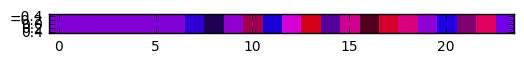

In [35]:
IM = np.zeros((24, 3))
for hour in range(24):
    amount_r.input['time'] = hour
    amount_g.input['time'] = hour
    amount_b.input['time'] = hour

    # Crunch the numbers
    amount_r.compute()
    amount_g.compute()
    amount_b.compute()


    pixel=[amount_r.output['red'], 
         0, #amount_g.output['green'],
         amount_b.output['blue']]
    IM[hour] = pixel
    
    
PLT.imshow([IM], interpolation="nearest")
PLT.show()

In [14]:
IM

array([[ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 127.        ,   42.33333333,  211.66666667],
       [ 128.68981211,   79.75845411,  210.65873016],
       [ 133.64109119,  105.29059829,  208.13888889],
       [ 142.11904762,  127.        ,  204.61111111],
       [ 155.22234819,  148.70940171,  208.13888889],
       [ 175.78823536,  174.24154589,  210.65873016],
       [ 211.66666667,  211.66666667,  211.66666667],
       [ 210.65873016,  174.24154589,  175.78823536],
       [ 208.13888889,  148.70940171,  155.22234819],
       [ 204.61111111,  127.        ,  142.11904762],
       [ 208.13888889,  105.29059829,  133.64109119],
       [ 210.65873016,   79.75845411,  128.68981211],
       [ 211.66666667,   42.

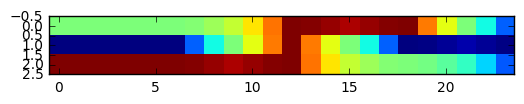

In [18]:
PLT.imshow(IM.T, interpolation="nearest")
PLT.show()

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


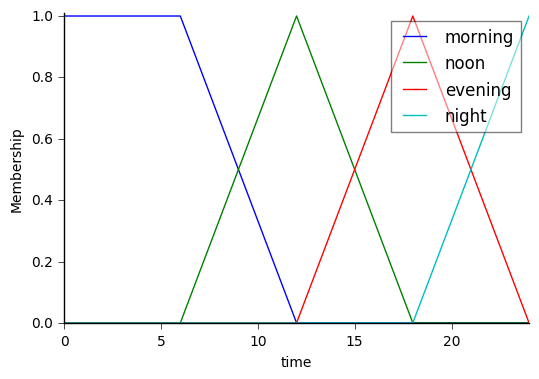

In [3]:
time.view()

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


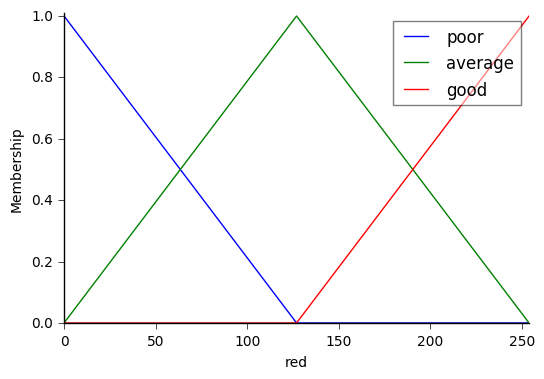

In [4]:
red.view()

(<matplotlib.figure.Figure at 0x9d16650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9d16990>)

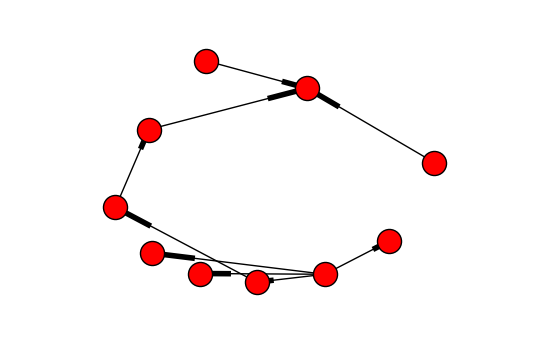

In [22]:
rule1b.view()

148.709401709 45.8611111111 120.358908806


C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


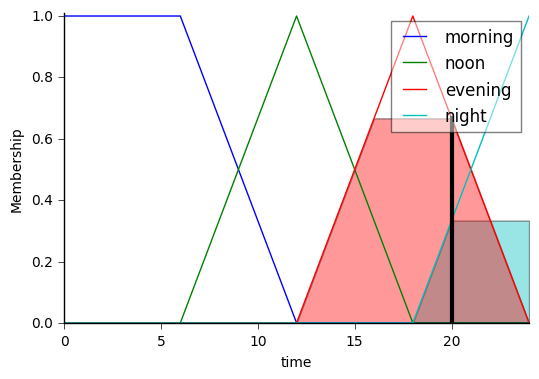

In [30]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
hour=20
amount_r.input['time'] = hour
amount_g.input['time'] = hour
amount_b.input['time'] = hour

# Crunch the numbers
amount_r.compute()
amount_g.compute()
amount_b.compute()

#print(amount_r.output)
print(amount_r.output['red'], 
     amount_g.output['green'],
     amount_b.output['blue'])

time.view(sim=amount_r)

In [8]:
help(red)

Help on Consequent in module skfuzzy.control.antecedent_consequent object:

class Consequent(skfuzzy.control.fuzzyvariable.FuzzyVariable)
 |  Consequent (output/control) variable for a fuzzy control system.
 |  
 |  Parameters
 |  ----------
 |  universe : array-like
 |      Universe variable. Must be 1-dimensional and convertible to a NumPy
 |      array.
 |  label : string
 |      Name of the universe variable.
 |  defuzzify_method : string
 |      name of method used for defuzzification, defaults to 'centroid'
 |  
 |  Notes
 |  -----
 |  The ``label`` string chosen must be unique among Antecedents and
 |  Consequents in the ``ControlSystem``.
 |  
 |  Method resolution order:
 |      Consequent
 |      skfuzzy.control.fuzzyvariable.FuzzyVariable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, universe, label, defuzzify_method='centroid')
 |      Initialization of fuzzy variable
 |      
 |      Parameters
 |      ----------
 |      universe : array-li

In [11]:
help(mpimg)

Help on module matplotlib.image in matplotlib:

NAME
    matplotlib.image

DESCRIPTION
    The image module supports basic image loading, rescaling and display
    operations.

CLASSES
    matplotlib.artist.Artist(builtins.object)
        FigureImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        PcolorImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
    matplotlib.cm.ScalarMappable(builtins.object)
        FigureImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        PcolorImage(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
    _AxesImageBase(matplotlib.artist.Artist, matplotlib.cm.ScalarMappable)
        AxesImage
            NonUniformImage
        BboxImage
    
    class AxesImage(_AxesImageBase)
     |  Abstract base class for someone who renders into a
     |  :class:`FigureCanvas`.
     |  
     |  Method resolution order:
     |      AxesImage
     |      _AxesImageBase
     |      matplotlib.artist.Artist
     |      matpl

In [12]:
image = np.array([[[10, 249, 10]]])

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
matplotlib.use('TkAgg')

C:\Users\james\AppData\Roaming\Python\Python35\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [69]:
(154).to_bytes(1, 'big')

b'\x9a'

In [70]:
bin(154)

'0b10011010'

In [66]:
int.from_bytes(b'\xf0', byteorder='big')

240